# Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [32]:
X = iris.data[:, :2]
y = iris.target
y[y==0] = -1
y[y==2] = 1
y[y==1] = 1    #making in binary class + fitting for svm


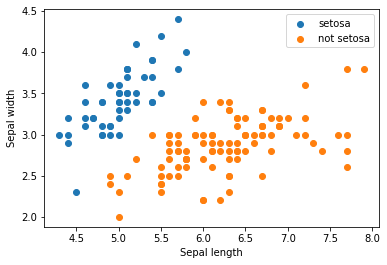

In [33]:
plt.scatter(X[:,0][y==-1], X[:,1][y==-1])
plt.scatter(X[:,0][y==1], X[:,1][y==1])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.legend(["setosa","not setosa"])
plt.show()

# Support Vector Machine 

Maximize margin between classes. 

In [43]:
w = np.zeros(len(X[0]))
alpha = 0.3
epochs = 100000
errors = []


for epoch in range(1,epochs):
    error = 0
    for i, x in enumerate(X):
        if (y[i]*np.dot(X[i], w)) < 1:
            w = w + alpha * ( (X[i] * y[i]) + (-2  *(1/epoch)* w) )
            error = 1
        else:
            w = w + alpha * (-2  *(1/epoch)* w)
    errors.append(error)



In [44]:
w

array([ 20.39969665, -34.98051962])

In [45]:
sum(errors)/epochs

0.99999

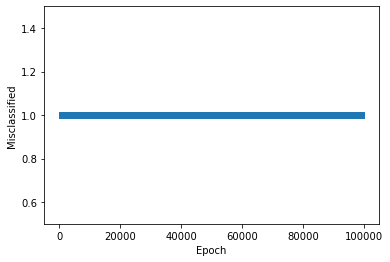

In [46]:
plt.plot(errors, '|')
plt.ylim(0.5,1.5)
plt.xlabel('Epoch')
plt.ylabel('Misclassified')
plt.show()